In [1]:
%matplotlib inline 
from scipy.stats import genextreme
import matplotlib.pyplot as plt
import pandas as pd
import glob
import numpy as np
import os

In [1]:
### MODELS LOCA ###

modelloca_hist = ["IPSL-CM5A-MR", "ACCESS1-3", "MRI-CGCM3", "HadGEM2-CC", "CNRM-CM5", "CanESM2", 
"ACCESS1-0", "HadGEM2-AO", "CSIRO-Mk3-6-0", "IPSL-CM5A-LR", "FGOALS-g2", "GISS-E2-H",
"inmcm4", "CESM1-CAM5", "HadGEM2-ES", "GFDL-ESM2G", "CMCC-CMS", "MIROC-ESM-CHEM", "CESM1-BGC", 
"GFDL-ESM2M", "CMCC-CM", "GISS-E2-R", "bcc-csm1-1-m", "CCSM4", "EC-EARTH", 
"bcc-csm1-1", "MPI-ESM-MR", "MIROC5", "NorESM1-M", "MPI-ESM-LR", "GFDL-CM3", "MIROC-ESM"]


In [3]:
scenario = ['rcp45-1', 'rcp45-2', 'rcp85-1', 'rcp85-2']
dataset = ['loca']

In [11]:
for d in dataset:

    for s in scenario:

        modelex = modelloca_hist

        for m in modelex:
            hist = 'gcm_data/returnlevels/hist/{}.hist.{}.csv'.format(d, m)
            fut =  'gcm_data/returnlevels/{}/{}.{}.{}.csv'.format(s, d, s, m)
            outfile = 'gcm_data/ratio/{}/{}.{}.csv'.format(s,d, m)
            savedir = 'gcm_data/ratio/{}/'.format(s)
            
            print(hist)
            print(fut)
            df1 = pd.read_csv(hist, index_col=['models'])
            df2 = pd.read_csv(fut, index_col=['models'])
            df3 = ((df2/df1))
            df3.drop(['Unnamed: 0'], axis=1, inplace=True)

            df3.dropna(how='all', inplace=True)

            if not os.path.exists(savedir):

                os.mkdir(savedir)

            df3.to_csv(outfile)


gcm_data/returnlevels/hist/loca.hist.IPSL-CM5A-MR.csv
gcm_data/returnlevels/rcp45-1/loca.rcp45-1.IPSL-CM5A-MR.csv
gcm_data/returnlevels/hist/loca.hist.ACCESS1-3.csv
gcm_data/returnlevels/rcp45-1/loca.rcp45-1.ACCESS1-3.csv
gcm_data/returnlevels/hist/loca.hist.MRI-CGCM3.csv
gcm_data/returnlevels/rcp45-1/loca.rcp45-1.MRI-CGCM3.csv
gcm_data/returnlevels/hist/loca.hist.HadGEM2-CC.csv
gcm_data/returnlevels/rcp45-1/loca.rcp45-1.HadGEM2-CC.csv
gcm_data/returnlevels/hist/loca.hist.CNRM-CM5.csv
gcm_data/returnlevels/rcp45-1/loca.rcp45-1.CNRM-CM5.csv
gcm_data/returnlevels/hist/loca.hist.CanESM2.csv
gcm_data/returnlevels/rcp45-1/loca.rcp45-1.CanESM2.csv
gcm_data/returnlevels/hist/loca.hist.ACCESS1-0.csv
gcm_data/returnlevels/rcp45-1/loca.rcp45-1.ACCESS1-0.csv
gcm_data/returnlevels/hist/loca.hist.HadGEM2-AO.csv
gcm_data/returnlevels/rcp45-1/loca.rcp45-1.HadGEM2-AO.csv
gcm_data/returnlevels/hist/loca.hist.CSIRO-Mk3-6-0.csv
gcm_data/returnlevels/rcp45-1/loca.rcp45-1.CSIRO-Mk3-6-0.csv
gcm_data/returnl

gcm_data/returnlevels/hist/loca.hist.MIROC-ESM-CHEM.csv
gcm_data/returnlevels/rcp85-1/loca.rcp85-1.MIROC-ESM-CHEM.csv
gcm_data/returnlevels/hist/loca.hist.CESM1-BGC.csv
gcm_data/returnlevels/rcp85-1/loca.rcp85-1.CESM1-BGC.csv
gcm_data/returnlevels/hist/loca.hist.GFDL-ESM2M.csv
gcm_data/returnlevels/rcp85-1/loca.rcp85-1.GFDL-ESM2M.csv
gcm_data/returnlevels/hist/loca.hist.CMCC-CM.csv
gcm_data/returnlevels/rcp85-1/loca.rcp85-1.CMCC-CM.csv
gcm_data/returnlevels/hist/loca.hist.GISS-E2-R.csv
gcm_data/returnlevels/rcp85-1/loca.rcp85-1.GISS-E2-R.csv
gcm_data/returnlevels/hist/loca.hist.bcc-csm1-1-m.csv
gcm_data/returnlevels/rcp85-1/loca.rcp85-1.bcc-csm1-1-m.csv
gcm_data/returnlevels/hist/loca.hist.CCSM4.csv
gcm_data/returnlevels/rcp85-1/loca.rcp85-1.CCSM4.csv
gcm_data/returnlevels/hist/loca.hist.EC-EARTH.csv
gcm_data/returnlevels/rcp85-1/loca.rcp85-1.EC-EARTH.csv
gcm_data/returnlevels/hist/loca.hist.bcc-csm1-1.csv
gcm_data/returnlevels/rcp85-1/loca.rcp85-1.bcc-csm1-1.csv
gcm_data/returnlevels/

In [ ]:
def get_future_depth(val, ix, ari):
    
    return median_cf.loc[ix, ari]*val

In [63]:
station = pd.read_csv("station_data/rp_best_depth_index_info.csv")
keep = ['ID', 'Lat', 'Lon', 'rp_b_2-yr',
       'rp_b_5-yr', 'rp_b_10-yr', 'rp_b_25-yr', 'rp_b_50-yr', 'rp_b_100-yr',
       'key_ix']
station_data = station.drop([x for x in station.columns if x not in keep], axis=1)
station_data = station_data.dropna(how='any', subset=['key_ix'])

In [67]:
for d in dataset:
    for s in scenario:
        data_s = []
        for file in glob.glob("gcm_data/ratio/{}/*".format(s)):
            df = pd.read_csv(file, index_col=['models'])
            data_s.append(df)
        median_cf = pd.concat(data_s).reset_index().groupby("models").median()
        
        for ari in ['2-yr', '5-yr', '10-yr', '25-yr', '50-yr', '100-yr']:
            new_col = "rp_{}_{}".format(s, ari)
            station_data[new_col] = station_data[["rp_b_{}".format(ari), "key_ix"]].apply(lambda x: get_future_depth(x[0], 
                                                                                                                x[1], ari), axis=1)

In [69]:
station_data.to_csv("station_data/station_w_future.csv")

In [84]:
df_single_station.drop([x for x in df_single_station.columns if x in del_cols], axis=1)

,rp_b_2-yr,rp_b_5-yr,rp_b_10-yr,rp_b_25-yr,rp_b_50-yr,rp_b_100-yr,rp_rcp85-2_2-yr,rp_rcp85-2_5-yr,rp_rcp85-2_10-yr,rp_rcp85-2_25-yr,...,rp_rcp45-2_10-yr,rp_rcp45-2_25-yr,rp_rcp45-2_50-yr,rp_rcp45-2_100-yr,rp_rcp85-1_2-yr,rp_rcp85-1_5-yr,rp_rcp85-1_10-yr,rp_rcp85-1_25-yr,rp_rcp85-1_50-yr,rp_rcp85-1_100-yr
0,2.18514,2.82409,3.25231,3.79934,4.20951,4.62035,2.57544,3.27751,3.76082,4.32851,...,3.55402,4.11975,4.54646,4.94661,2.44921,3.14946,3.62351,4.16677,4.48864,4.85357


## Code from here on is to make plots out of the
## table (csv) that we generated above.

In [85]:
df_single_station.columns

Index(['ID', 'Lat', 'Lon', 'rp_b_2-yr', 'rp_b_5-yr', 'rp_b_10-yr',
       'rp_b_25-yr', 'rp_b_50-yr', 'rp_b_100-yr', 'key_ix', 'rp_rcp85-2_2-yr',
       'rp_rcp85-2_5-yr', 'rp_rcp85-2_10-yr', 'rp_rcp85-2_25-yr',
       'rp_rcp85-2_50-yr', 'rp_rcp85-2_100-yr', 'rp_rcp45-1_2-yr',
       'rp_rcp45-1_5-yr', 'rp_rcp45-1_10-yr', 'rp_rcp45-1_25-yr',
       'rp_rcp45-1_50-yr', 'rp_rcp45-1_100-yr', 'rp_rcp45-2_2-yr',
       'rp_rcp45-2_5-yr', 'rp_rcp45-2_10-yr', 'rp_rcp45-2_25-yr',
       'rp_rcp45-2_50-yr', 'rp_rcp45-2_100-yr', 'rp_rcp85-1_2-yr',
       'rp_rcp85-1_5-yr', 'rp_rcp85-1_10-yr', 'rp_rcp85-1_25-yr',
       'rp_rcp85-1_50-yr', 'rp_rcp85-1_100-yr'],
      dtype='object')

In [86]:
df_hist = df_single_station[['rp_b_2-yr', 'rp_b_5-yr', 'rp_b_10-yr',
       'rp_b_25-yr', 'rp_b_50-yr', 'rp_b_100-yr']]

In [87]:
df_rcp45_1 = df_single_station[['rp_rcp45-1_2-yr',
       'rp_rcp45-1_5-yr', 'rp_rcp45-1_10-yr', 'rp_rcp45-1_25-yr',
       'rp_rcp45-1_50-yr', 'rp_rcp45-1_100-yr']]

In [88]:
df_rcp45_2 = df_single_station[['rp_rcp45-2_2-yr',
       'rp_rcp45-2_5-yr', 'rp_rcp45-2_10-yr', 'rp_rcp45-2_25-yr',
       'rp_rcp45-2_50-yr', 'rp_rcp45-2_100-yr']]

In [89]:
df_rcp85_1=df_single_station[['rp_rcp85-1_2-yr',
       'rp_rcp85-1_5-yr', 'rp_rcp85-1_10-yr', 'rp_rcp85-1_25-yr',
       'rp_rcp85-1_50-yr', 'rp_rcp85-1_100-yr']]

In [90]:
df_rcp85_2=df_single_station[['rp_rcp85-2_2-yr',
       'rp_rcp85-2_5-yr', 'rp_rcp85-2_10-yr', 'rp_rcp85-2_25-yr',
       'rp_rcp85-2_50-yr', 'rp_rcp85-2_100-yr']]

Text(0.5, 0, 'Average Recurrence Interval (ARI)')

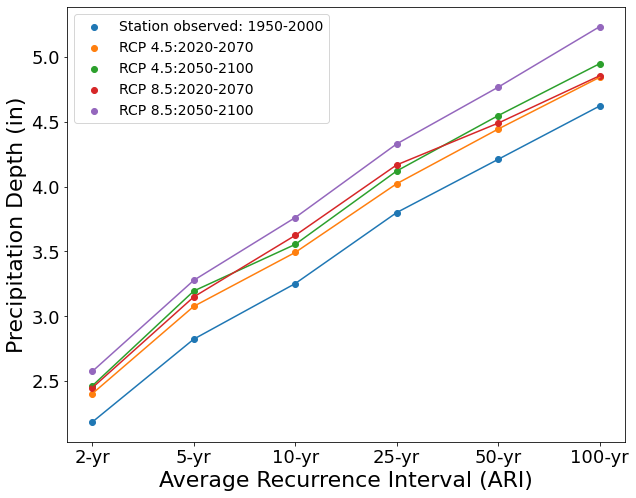

In [122]:
plt.figure(figsize=(10,8))
plt.scatter(x=np.arange(len(ari)), y=df_hist.loc[0, :].values, label="Station observed: 1950-2000")
plt.plot(df_hist.loc[0, :].values)
plt.scatter(x=np.arange(len(ari)), y=df_rcp45_1.loc[0, :].values, label="RCP 4.5:2020-2070")
plt.plot(df_rcp45_1.loc[0, :].values)
plt.scatter(x=np.arange(len(ari)), y=df_rcp45_2.loc[0, :].values, label="RCP 4.5:2050-2100")
plt.plot(df_rcp45_2.loc[0, :].values)
plt.scatter(x=np.arange(len(ari)), y=df_rcp85_1.loc[0, :].values, label="RCP 8.5:2020-2070")
plt.plot(df_rcp85_1.loc[0, :].values)
plt.scatter(x=np.arange(len(ari)), y=df_rcp85_2.loc[0, :].values, label="RCP 8.5:2050-2100")
plt.plot(df_rcp85_2.loc[0, :].values)
plt.legend(fontsize=14)
plt.xticks(np.arange(0,6), ['2-yr', '5-yr', '10-yr', '25-yr', '50-yr', '100-yr'], fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Precipitation Depth (in)", fontsize=22)
plt.xlabel("Average Recurrence Interval (ARI)", fontsize=22)